In [1]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
from torch.autograd import Variable as V

In [2]:
device = t.device('cpu')

In [3]:
t.manual_seed(1) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

In [4]:
w=V(t.rand(1,1),requires_grad=True)
b=V(t.zeros(1,1),requires_grad=True)
lr=0.001
loss_function = t.nn.MSELoss()#(x-y)**2

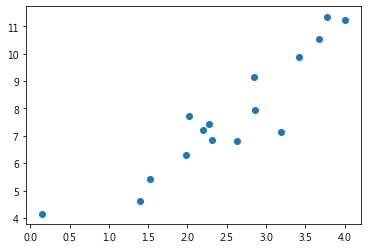

In [5]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

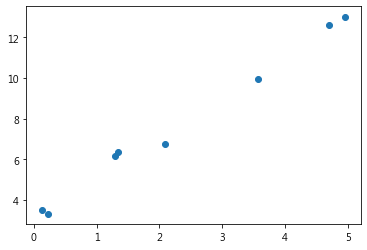

In [6]:
x,y=get_fake_data()
x,y=V(x),V(y)
plt.scatter(x,y)

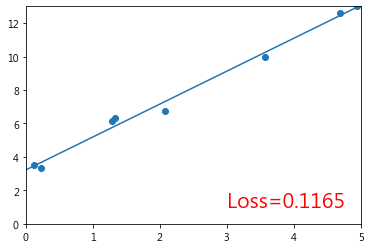

1.966767430305481 3.2216365337371826
tensor(0.1165, grad_fn=<MseLossBackward>)


In [7]:
for ii in range(8000):

    # y=ax+b
    y_pred=x.mm(w)+b
    
    
    loss = loss_function(y_pred,y)
    
    loss.backward()
    
    w.data.sub_(lr*w.grad.data)
    b.data.sub_(lr*b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii%100==0:
        display.clear_output(wait=True)
        x1=t.arange(0,6).view(-1,1).float()
        y1=x1.mm(w.data)+b.data.expand_as(x1)
        plt.plot(x1.numpy(),y1.numpy())
        plt.scatter(x.data.numpy(),y.data.numpy())

        plt.text(3, 1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(0,5)
        plt.ylim(0,13)   
        plt.show()
        plt.pause(0.5)       
    
    
    
print(w.item(), b.item())
print(loss)